# Census Income Project

**Problem Statement:**


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state

# Importing Libraries

In [108]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.cm import rainbow
import seaborn as sns
from matplotlib import rcParams
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [51]:
cdf = pd.read_csv('Census1.txt' , sep = ',' )

Changing columns name 

In [52]:
cdf.columns = columns = ['Age', 'Work_Class', 'Final_Weight', 'Education', 'Education_Number', 'Marital_Status', 'Occupation',
          'Relationship', 'Race', 'Sex', 'Capital_Gain', 'Capital_Loss', 'Hours_per_Week', 'Country', 'Income']

In [53]:
cdf

,Age,Work_Class,Final_Weight,Education,Education_Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [54]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32560 non-null  int64 
 1   Work_Class        32560 non-null  object
 2   Final_Weight      32560 non-null  int64 
 3   Education         32560 non-null  object
 4   Education_Number  32560 non-null  int64 
 5   Marital_Status    32560 non-null  object
 6   Occupation        32560 non-null  object
 7   Relationship      32560 non-null  object
 8   Race              32560 non-null  object
 9   Sex               32560 non-null  object
 10  Capital_Gain      32560 non-null  int64 
 11  Capital_Loss      32560 non-null  int64 
 12  Hours_per_Week    32560 non-null  int64 
 13  Country           32560 non-null  object
 14  Income            32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [55]:
cdf['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

From above target variable we can observe that this is purely a classification problem.

# Exploratory Data Analysis (EDA)

In [56]:
cdf.isnull().sum()

Age                 0
Work_Class          0
Final_Weight        0
Education           0
Education_Number    0
Marital_Status      0
Occupation          0
Relationship        0
Race                0
Sex                 0
Capital_Gain        0
Capital_Loss        0
Hours_per_Week      0
Country             0
Income              0
dtype: int64

In [57]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32560 non-null  int64 
 1   Work_Class        32560 non-null  object
 2   Final_Weight      32560 non-null  int64 
 3   Education         32560 non-null  object
 4   Education_Number  32560 non-null  int64 
 5   Marital_Status    32560 non-null  object
 6   Occupation        32560 non-null  object
 7   Relationship      32560 non-null  object
 8   Race              32560 non-null  object
 9   Sex               32560 non-null  object
 10  Capital_Gain      32560 non-null  int64 
 11  Capital_Loss      32560 non-null  int64 
 12  Hours_per_Week    32560 non-null  int64 
 13  Country           32560 non-null  object
 14  Income            32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Final_Weight'}>],
       [<AxesSubplot:title={'center':'Education_Number'}>,
        <AxesSubplot:title={'center':'Capital_Gain'}>],
       [<AxesSubplot:title={'center':'Capital_Loss'}>,
        <AxesSubplot:title={'center':'Hours_per_Week'}>]], dtype=object)

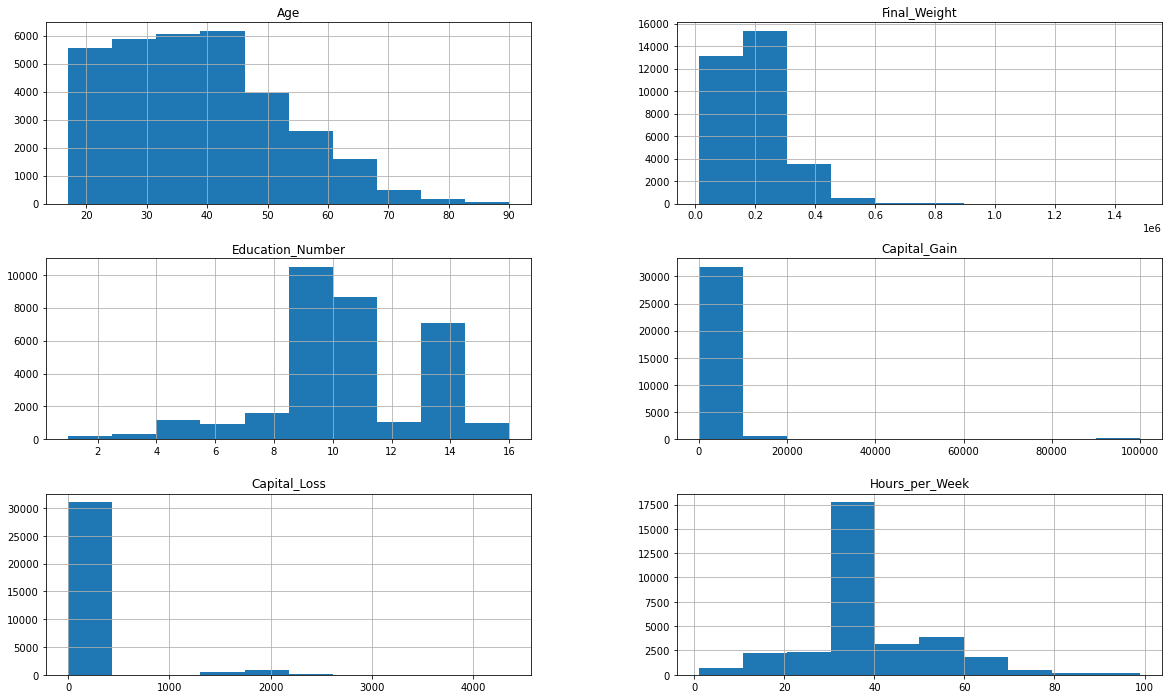

In [58]:
rcParams['figure.figsize'] = 20, 12
cdf[['Age', 'Final_Weight', 'Education_Number', 'Capital_Gain', 'Capital_Loss', 'Hours_per_Week']].hist()

From the histograms above, we can infer the following:<br>

We can group the Age column into bins.<br>
For Capital Gain and Capital Loss the data is highly left skewed which needs to be tackled.<br>
We need to analyse Education Number further as it might align with Education information.<br>
Final Weight is also left skewed.<br>
The Hours per Week can also be split into bins.<br>

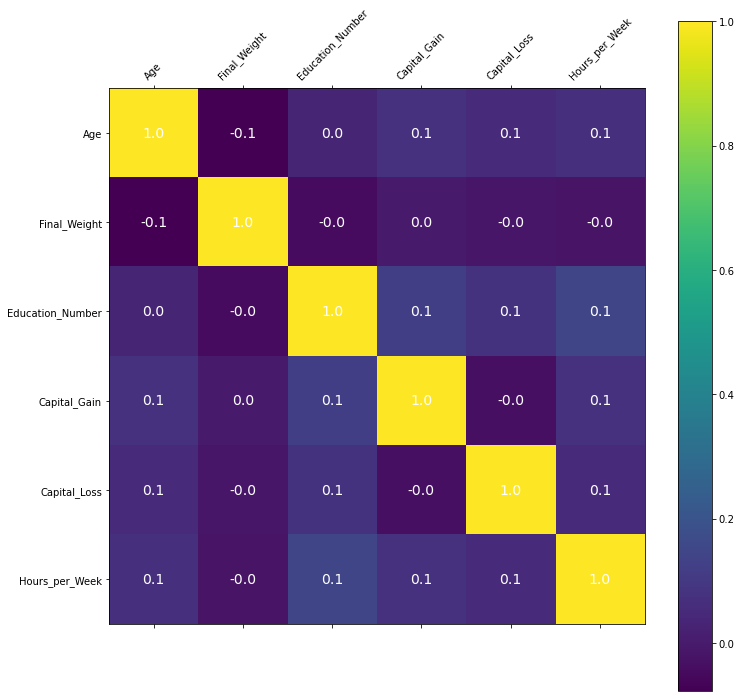

In [59]:
plt.matshow(cdf.corr())
plt.colorbar()
plt.xticks(np.arange(len(cdf.corr().columns)), cdf.corr().columns.values, rotation = 45) 
plt.yticks(np.arange(len(cdf.corr().columns)), cdf.corr().columns.values) 
for (i, j), corr in np.ndenumerate(cdf.corr()):
    plt.text(j, i, '{:0.1f}'.format(corr), ha='center', va='center', color='white', fontsize=14)


Taking a look at the correlation matrix above, it's clear that there is not a very high linear correlation between any of the continuous features and the target variable. Also, Final Weight has zero correlation with the output class and hence, We'll drop this column later.<br>

We'll now analyse the categorical features using CountPlot

**Age**


Here, I'll bucket the age into separate bins.

0-25: Young<br>
25-50: Adult<br>
50-100: Old<br>

In [60]:
cdf['Age'] = pd.cut(cdf['Age'], bins = [0, 25, 50, 100], labels = ['Young', 'Adult', 'Old'])

<AxesSubplot:xlabel='Age', ylabel='count'>

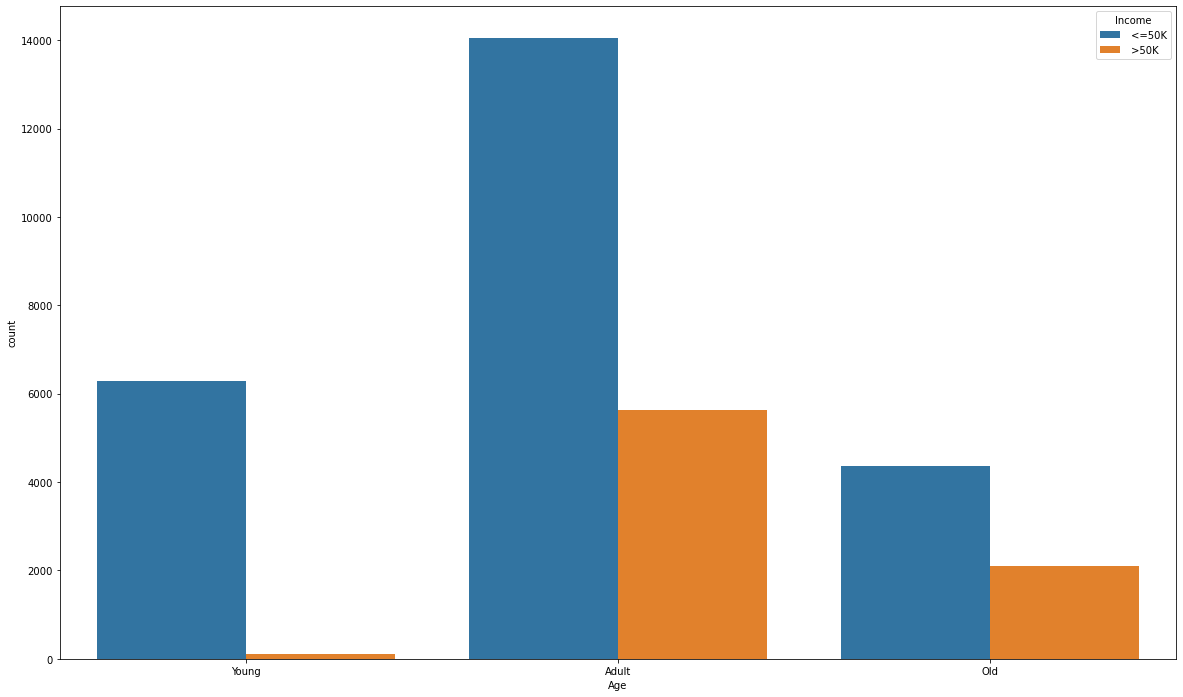

In [61]:
sns.countplot(x = 'Age', hue = 'Income', data = cdf)


It appears that there are relatively less Young people who have an income more than $50K.

**Capital Gain and Capital Loss**<br>

Rather than having both Capital Gain and Capital Loss, we will use their difference as that is more relevant and gives the change.

In [63]:
cdf['Capital_Diff'] = cdf['Capital_Gain'] - cdf['Capital_Loss']
cdf.drop(['Capital_Gain'], axis = 1, inplace = True)
cdf.drop(['Capital_Loss'], axis = 1, inplace = True)

<AxesSubplot:xlabel='Capital_Diff', ylabel='count'>

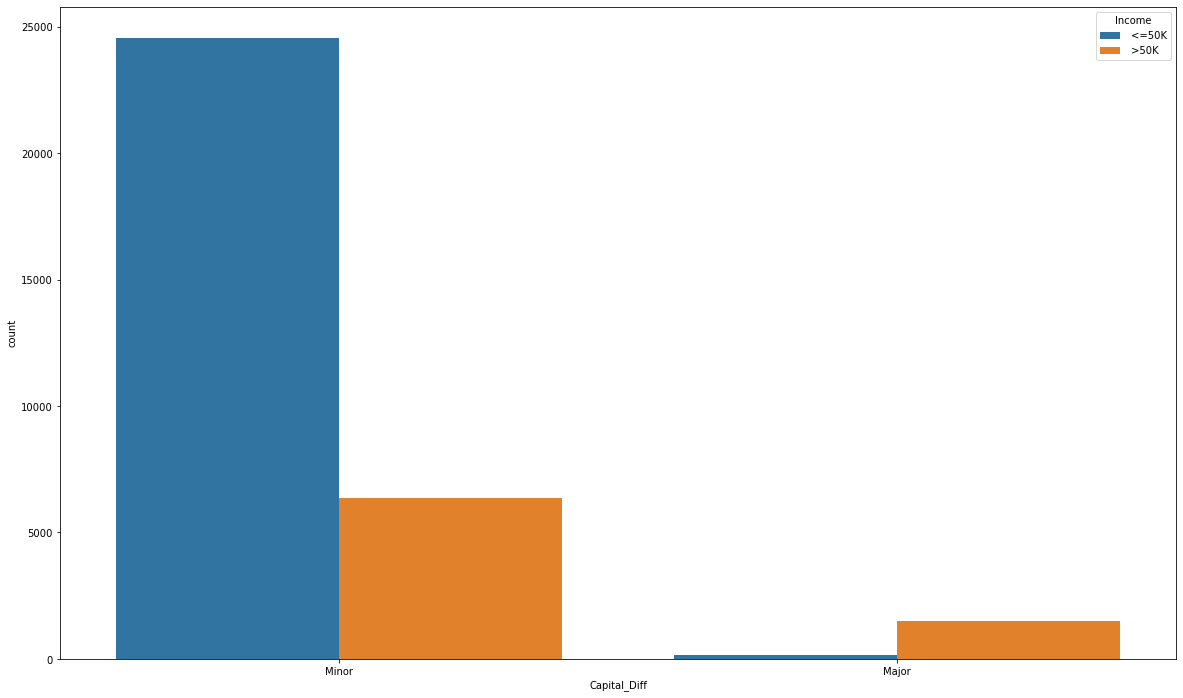

In [64]:
cdf['Capital_Diff'] = pd.cut(cdf['Capital_Diff'], bins = [-5000, 5000, 100000], labels = ['Minor', 'Major'])
sns.countplot(x = 'Capital_Diff', hue = 'Income', data = cdf)


On taking a look at the result, we can see that the for Minor there are more people with Income less than 50K and for Major there are more people with Income greater than 50K. This is in complete agreement with the fact that people who have large Capital Gain compared to Capital Loss have Income more than $50K.

**Final Weight**<br>
As seen above, there is no correlation between Income and Final Weight, so I will drop this column

In [65]:

cdf.drop(['Final_Weight'], axis = 1, inplace = True)

**Hours per Week**<br>

Taking a look at the histogram for Hours per Week, we can see that the dataset is aligned around the center. we can still create buckets from this data. As usually, the work hours are close to 30-40 hours, We'll create the buckets as 0-30, 30-40, and 40-100

In [66]:
cdf['Hours_per_Week'] = pd.cut(cdf['Hours_per_Week'], 
                                   bins = [0, 30, 40, 100], 
                                   labels = ['Lesser_Hours', 'Normal_Hours', 'Extr_Hours'])

<AxesSubplot:xlabel='Hours_per_Week', ylabel='count'>

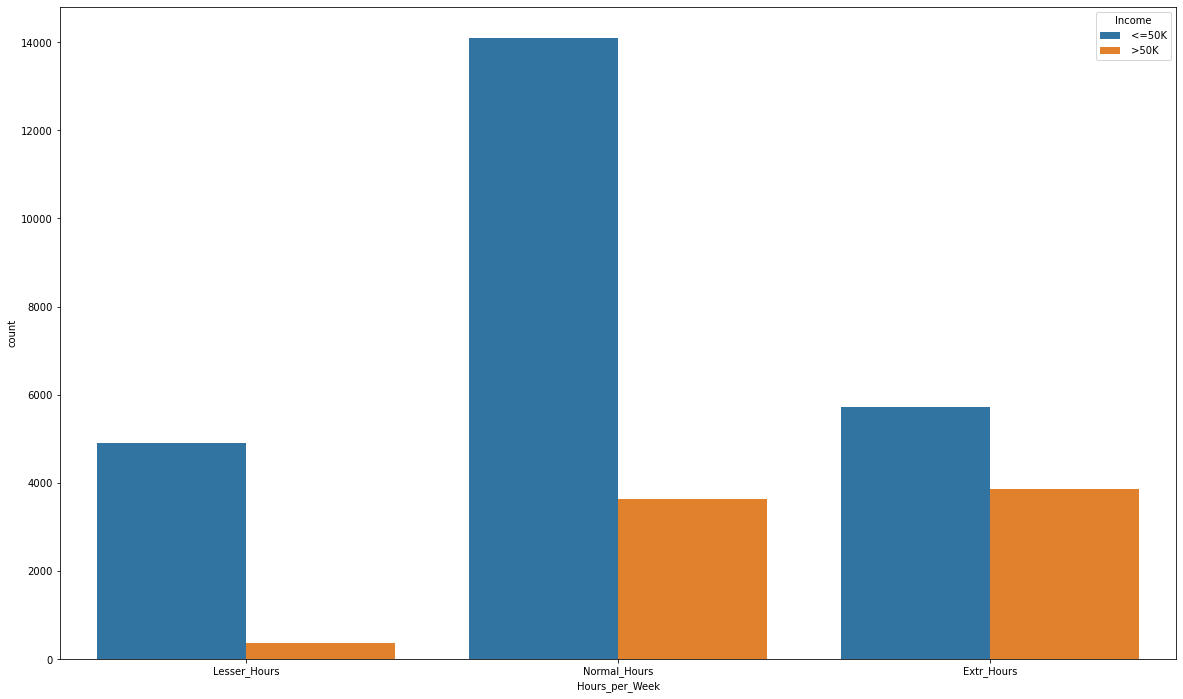

In [67]:
sns.countplot(x = 'Hours_per_Week', hue = 'Income', data = cdf)

Taking a look at the plot above, we can see a trend. As the number of hours increase, the number of people earning more than $50K increases in comparison to the people earning less

**Work Class**

In [ ]:
cdf['Work_Class'].value_counts()

<AxesSubplot:xlabel='Work_Class', ylabel='count'>

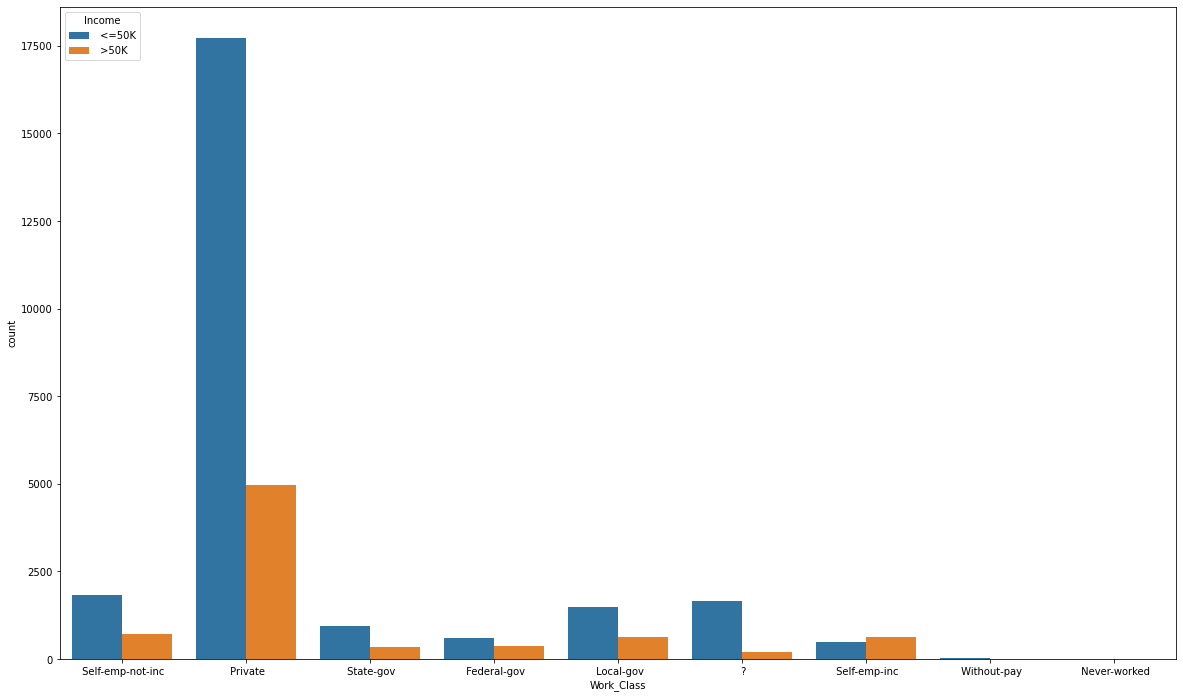

In [68]:
sns.countplot(x = 'Work_Class', hue = 'Income', data = cdf)


Taking a look at the plot above, we can see that there are Work Class values defined as ? which appears to be error data. As it is very less, We'll simply remove these records. Also, the two values Without-pay and Never-worked are negligible and hence it is safe to drop them too

In [70]:
cdf = cdf.drop(cdf[cdf['Work_Class'] == ' ?'].index)
cdf = cdf.drop(cdf[cdf['Work_Class'] == ' Without-pay'].index)
cdf = cdf.drop(cdf[cdf['Work_Class'] == ' Never-worked'].index)

**Education and Education Number**<br>

It's a good time to check if there is any relation between Education and Education Number.

<AxesSubplot:xlabel='Education', ylabel='count'>

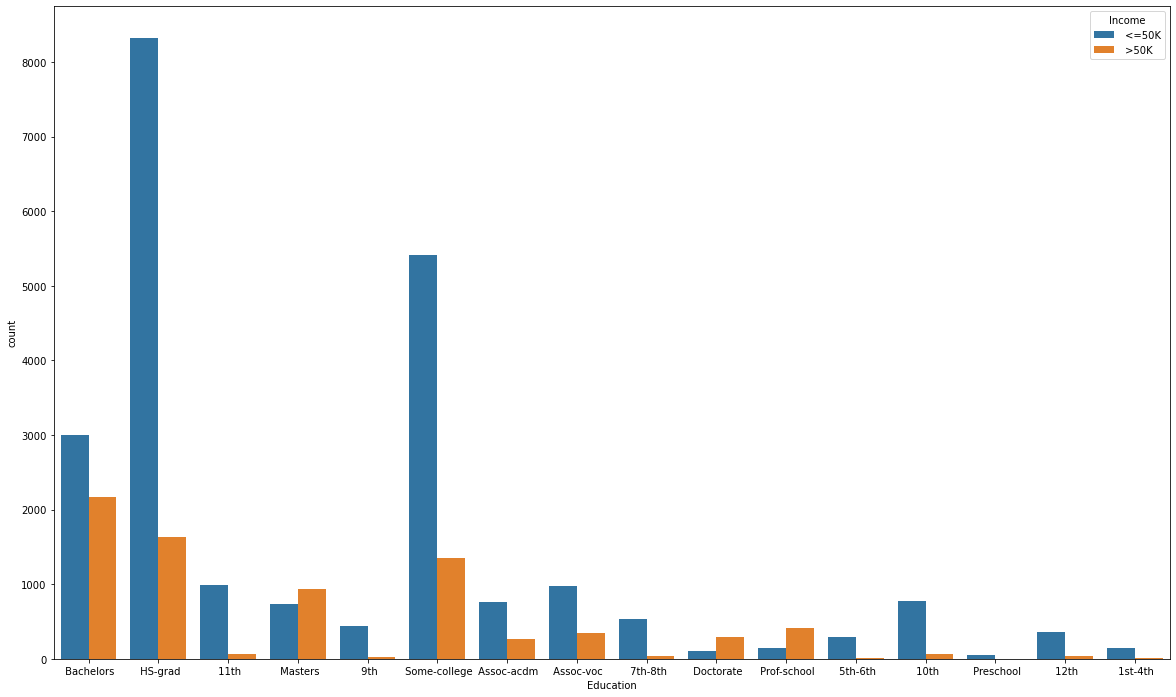

In [71]:
sns.countplot(x = 'Education', hue = 'Income', data = cdf)

In [72]:
education_classes = cdf['Education'].unique()
for edu_class in education_classes:
    print("For {}, the Education Number is {}"
          .format(edu_class, cdf[cdf['Education'] == edu_class]['Education_Number'].unique()))

For  Bachelors, the Education Number is [13]
For  HS-grad, the Education Number is [9]
For  11th, the Education Number is [7]
For  Masters, the Education Number is [14]
For  9th, the Education Number is [5]
For  Some-college, the Education Number is [10]
For  Assoc-acdm, the Education Number is [12]
For  Assoc-voc, the Education Number is [11]
For  7th-8th, the Education Number is [4]
For  Doctorate, the Education Number is [16]
For  Prof-school, the Education Number is [15]
For  5th-6th, the Education Number is [3]
For  10th, the Education Number is [6]
For  Preschool, the Education Number is [1]
For  12th, the Education Number is [8]
For  1st-4th, the Education Number is [2]


From the analysis above, We have discovered that Education Number and Education are just the same. So, we can drop any one column. Also, we'll combine all information from Preschool to 12th as they can be considered of one class who have no college/university level education.


In [73]:
cdf.drop(['Education_Number'], axis = 1, inplace = True)
cdf['Education'].replace([' 11th', ' 9th', ' 7th-8th', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th'],
                             ' School', inplace = True)
cdf['Education'].value_counts()


 HS-grad         9959
 Some-college    6772
 Bachelors       5181
 School          3820
 Masters         1675
 Assoc-voc       1321
 Assoc-acdm      1019
 Prof-school      558
 Doctorate        398
Name: Education, dtype: int64

**Marital Status and Relationship**

In [74]:
cdf['Marital_Status'].value_counts()

 Married-civ-spouse       14331
 Never-married             9907
 Divorced                  4258
 Separated                  959
 Widowed                    839
 Married-spouse-absent      388
 Married-AF-spouse           21
Name: Marital_Status, dtype: int64

In [75]:

cdf['Relationship'].value_counts()

 Husband           12700
 Not-in-family      7864
 Own-child          4520
 Unmarried          3269
 Wife               1432
 Other-relative      918
Name: Relationship, dtype: int64

Both of them have no missing values. There is some overlap between the two such as if the person is Husband or Wife, then their marital status would be Married. However, as there is no complete overlap, We'll keep both these columns.

**Occupation**

<AxesSubplot:xlabel='Occupation', ylabel='count'>

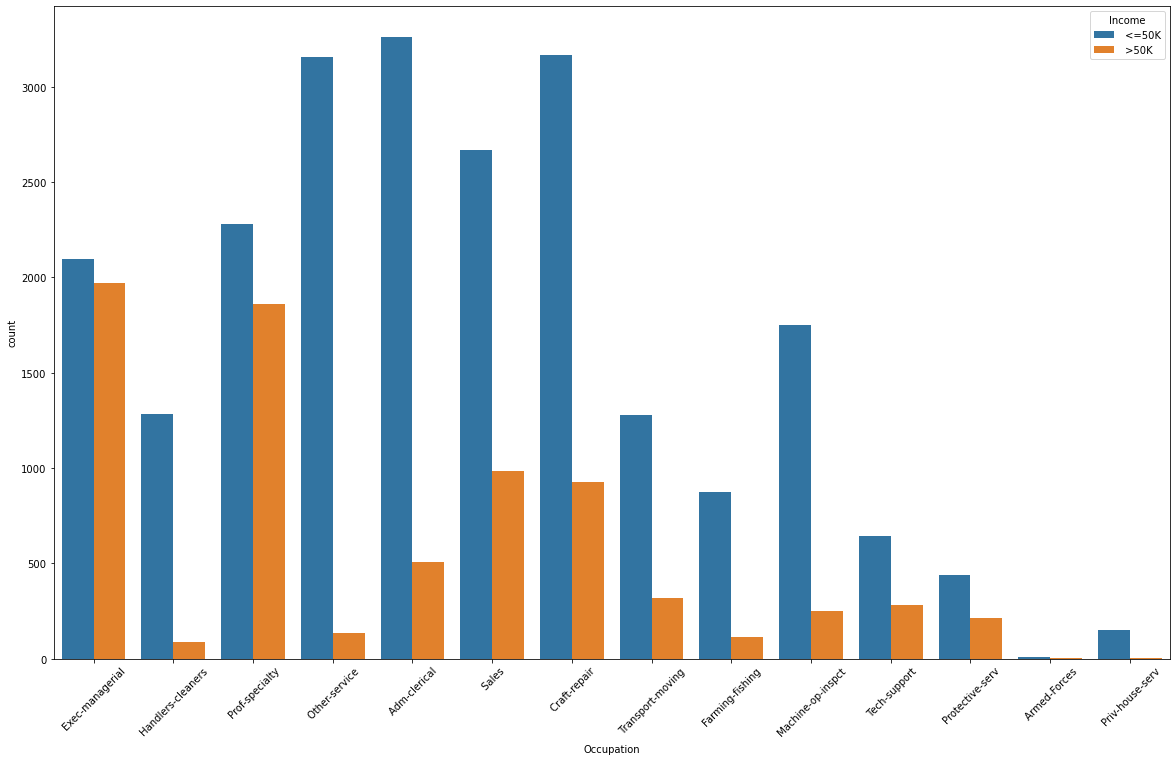

In [76]:
plt.xticks(rotation = 45)
sns.countplot(x = 'Occupation', hue = 'Income', data = cdf)

The data has no missing values. The categories have already been uniquely defined and we can keep it as it is.

**Race**

<AxesSubplot:xlabel='Race', ylabel='count'>

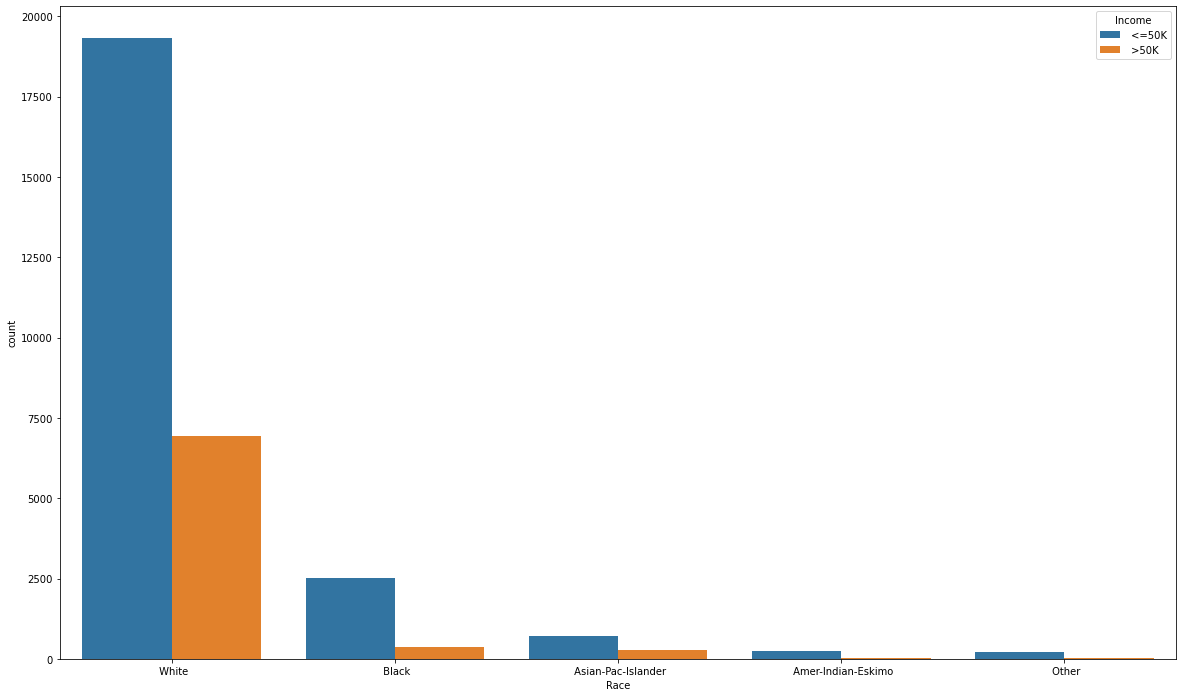

In [77]:
sns.countplot(x = 'Race', hue = 'Income', data = cdf)

In [78]:
cdf['Race'].unique()
cdf['Race'].replace([' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other'],' Other', inplace = True)

**Sex**

<AxesSubplot:xlabel='Sex', ylabel='count'>

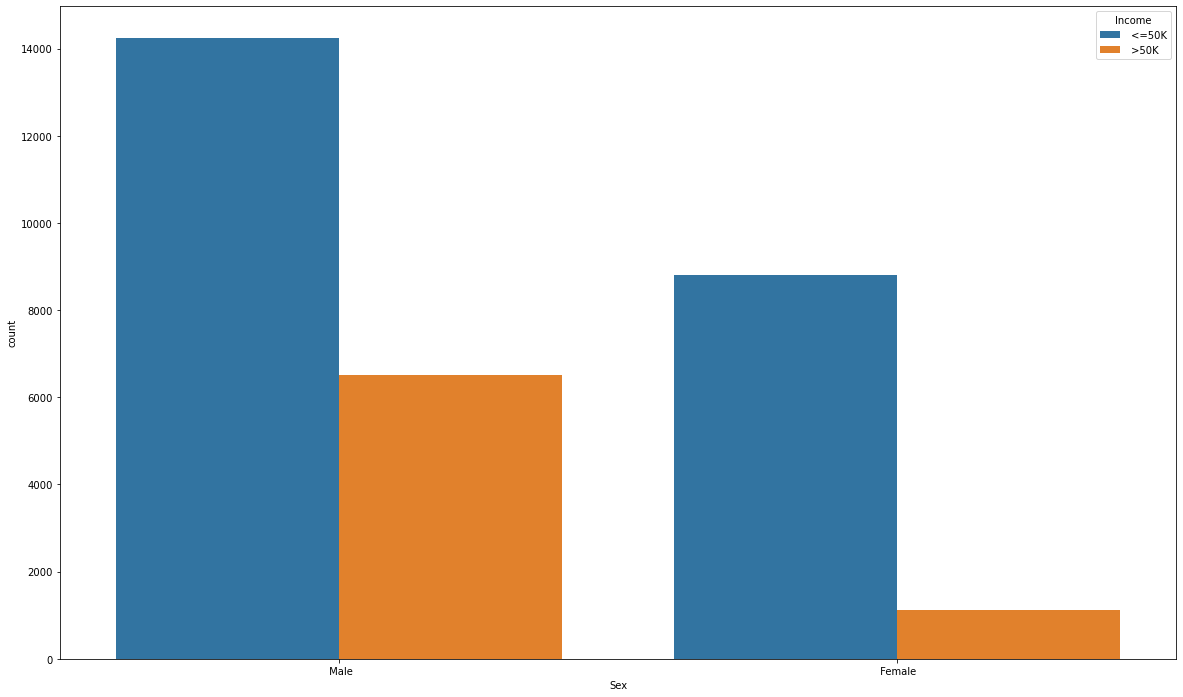

In [79]:
sns.countplot(x = 'Sex', hue = 'Income', data = cdf)

From the plot above, it is clear that

There are more Male participants than Female participants
When we compare the two genders and the corresponding income distribution, more percentage of Males have an Income of more than \$50K than Females.

**Country**

In [80]:
country_count = cdf['Country'].value_counts()
country_count

 United-States                 27490
 Mexico                          610
 ?                               556
 Philippines                     187
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Columbia                         56
 Poland                           56
 Iran                             42
 Haiti                            42
 Taiwan                           42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 

Text(0.5, 1.0, 'Total adults from each Country')

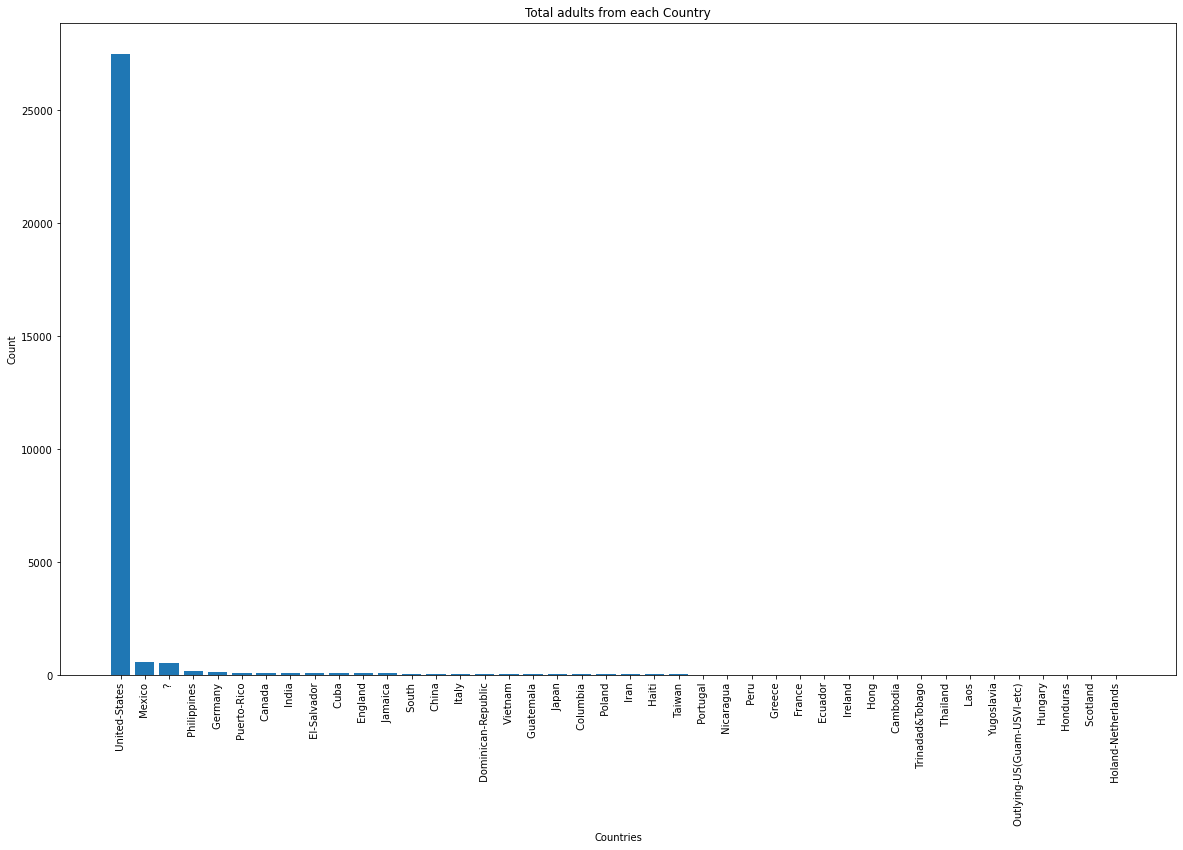

In [81]:
plt.bar(country_count.index, country_count.values)
plt.xticks(rotation = 90)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Total adults from each Country')


There are two things that we can notice:

There are some missing values in Country column denoted by ?. As they are very less, We'll drop these rows.<br>
The majority of adults are from United States. Thus, we can distribute the column with values as either United States or Other

In [84]:
cdf = cdf.drop(cdf[cdf['Country'] == ' ?'].index)

In [85]:
countries = np.array(cdf['Country'].unique())
countries = np.delete(countries, 0)

In [86]:
cdf['Country'].replace(countries, 'Other', inplace = True)

<AxesSubplot:xlabel='count', ylabel='Country'>

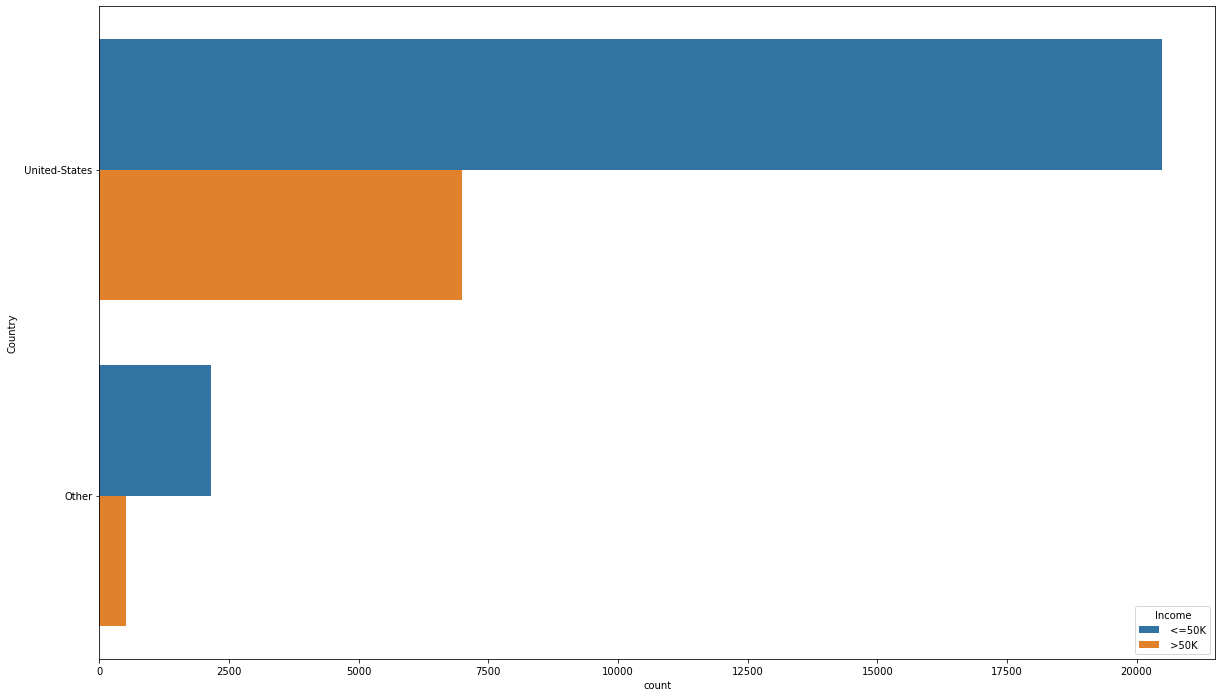

In [87]:
sns.countplot(y = 'Country', hue = 'Income', data = cdf)


The data now appears much better.

We've analysed all columns. We'll simply convert categorical columns to numerical.

**Data Manipulation**

In this subsection, we'll take all the remaining columns and create important numerical values out of them.<br>
We will use the get_dummies method of pandas to get separate columns for each feature based on the unqiue values in the dataset

In [88]:
y = cdf['Income']
x = cdf.drop(['Income'], axis = 1)
x = pd.get_dummies(x)
print("Total features: {}".format(x.shape[1]))

Total features: 56


In [90]:
x.head()

,Age_Young,Age_Adult,Age_Old,Work_Class_ Federal-gov,Work_Class_ Local-gov,Work_Class_ Private,Work_Class_ Self-emp-inc,Work_Class_ Self-emp-not-inc,Work_Class_ State-gov,Education_ Assoc-acdm,...,Race_ White,Sex_ Female,Sex_ Male,Hours_per_Week_Lesser_Hours,Hours_per_Week_Normal_Hours,Hours_per_Week_Extr_Hours,Country_ United-States,Country_Other,Capital_Diff_Minor,Capital_Diff_Major
0,0,1,0,0,0,0,0,1,0,0,...,1,0,1,1,0,0,1,0,1,0
1,0,1,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
3,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,1,0
4,0,1,0,0,0,1,0,0,0,0,...,1,1,0,0,1,0,1,0,1,0


In [91]:
y

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32555     <=50K
32556      >50K
32557     <=50K
32558     <=50K
32559      >50K
Name: Income, Length: 30147, dtype: object

In [140]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [141]:
y

array([0, 0, 0, ..., 0, 0, 1])

Next, We will split the dataset into the training and testing data using train_test_split.

In [144]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

# Machine Learning Models

We'll apply these algorithms

**Naive Bayes Classifier**,<br> **Support Vector Classifier**,<br> **Decision Tree Classifier**,<br> **Random Forest Classifier**<br> and **Gradient Boosting Classifier**.

In [145]:
classifiers = [GaussianNB(), 
               SVC(kernel = 'rbf', probability = True), 
               DecisionTreeClassifier(random_state = 0), 
               RandomForestClassifier(n_estimators = 100, random_state = 0), 
               GradientBoostingClassifier(random_state = 0)]
classifier_names = ["Gaussian Naive Bayes", 
                    "Support Vector Classifier", 
                    "Decision Tree Classifier", 
                    "Random Forest Classifier", 
                    "Gradient Boosting Classifier"]

In [148]:
for i in range(len(classifiers)):
    classifier = classifiers[i]
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("{}:".format(classifier_names[i]))
    print("F1 score: {:.2f}".format(f1_score(y_test, y_pred)))
    accuracy = accuracy_score(y_test, y_pred)*100
    print("Accuracy_Score" ,accuracy)

Gaussian Naive Bayes:
R2 score: 0.68
Accuracy_Score 79.8562741846324
Support Vector Classifier:
R2 score: 0.65
Accuracy_Score 84.42233278054174
Decision Tree Classifier:
R2 score: 0.62
Accuracy_Score 82.1779988944168
Random Forest Classifier:
R2 score: 0.64
Accuracy_Score 83.53786622443339
Gradient Boosting Classifier:
R2 score: 0.64
Accuracy_Score 84.46655610834716


Analysing Results
We'll use Accuracy Plot and ROC Curve to analyse the results.|

From the cells above, we can see that GradientBoostingClassifier performed the best with a score of 84.

**Accuracy Plot**

Text(0.5, 1.0, 'Plot for accuracy of all classifiers')

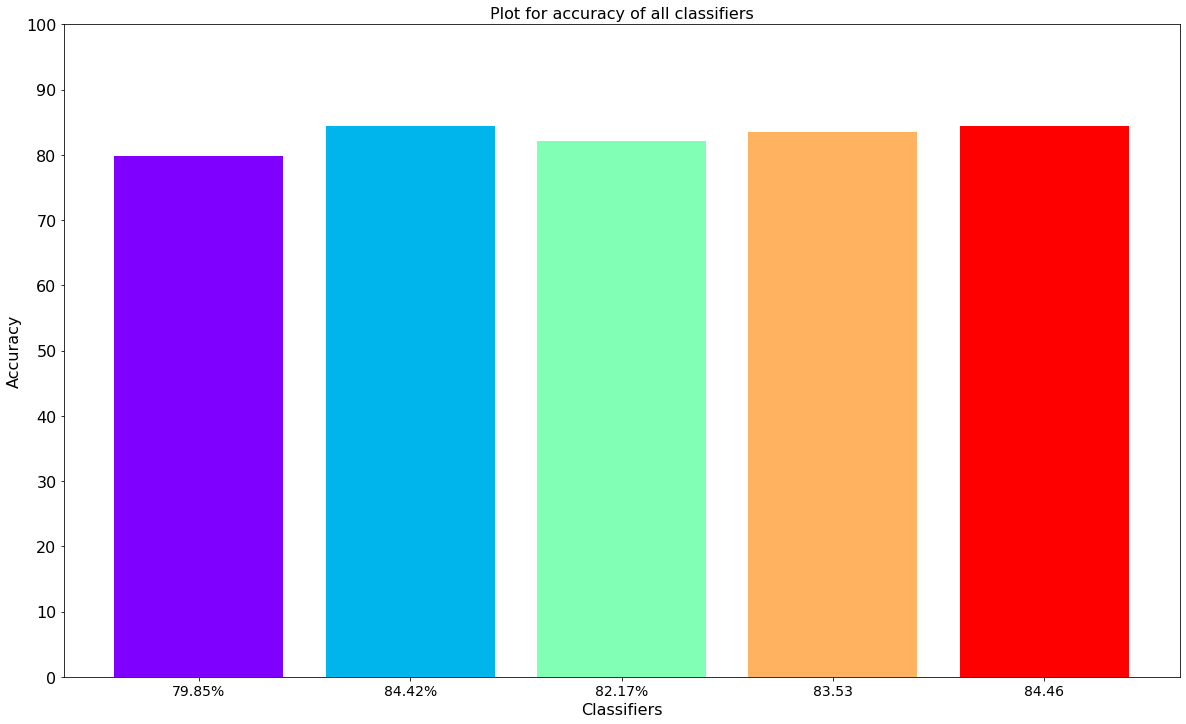

In [154]:

heights  = [79.85 , 84.42 , 82.17 , 83.53 , 84.46]

plt.figure(figsize = (20, 12))
colors = rainbow(np.linspace(0, 1, len(classifiers)))
barplot = plt.bar(classifier_names, heights , color = colors ,tick_label = ['79.85%' , '84.42%' , '82.17%' , '83.53' , '84.46'])
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], fontsize = 16)
plt.xticks(fontsize = 14)
plt.xlabel("Classifiers", fontsize = 16)
plt.ylabel("Accuracy", fontsize = 16)
plt.title("Plot for accuracy of all classifiers", fontsize = 16)

As it can be seen from the plot above, the Gradient Boosting Classifier had the best accuracy. Graphs make representing information really easy and intuitive.



**ROC Curve**

Let's also analyse the ROC Curve for the predictions for income more than $50K.



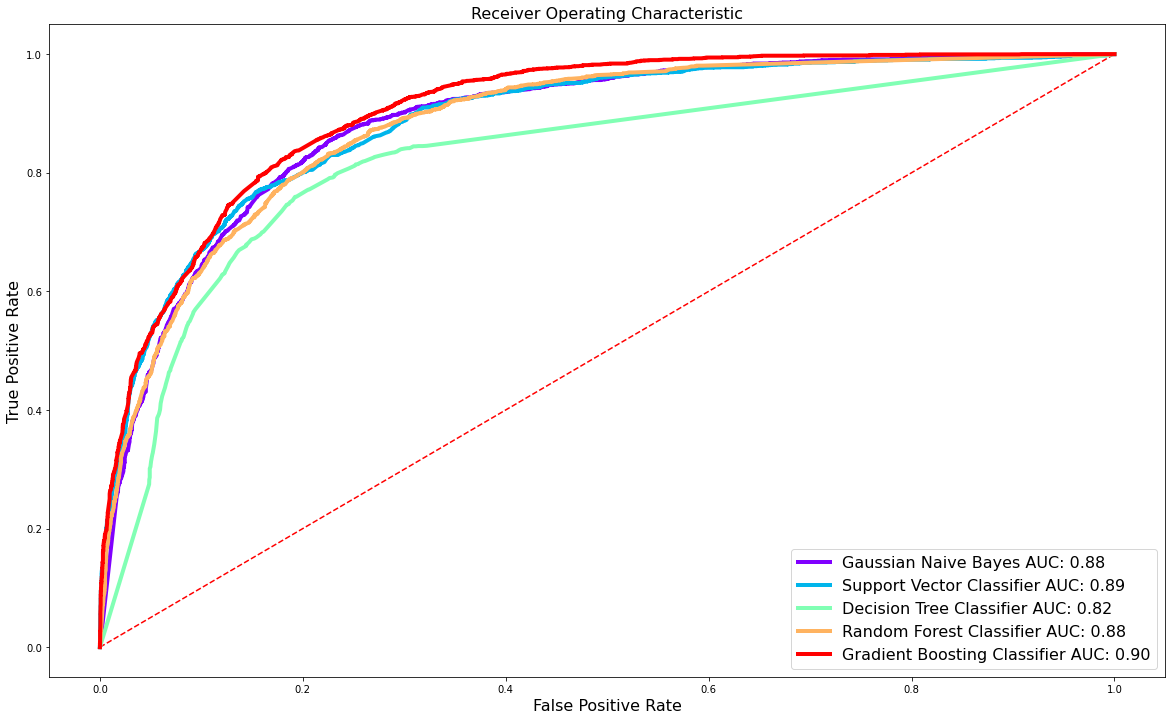

In [155]:

from sklearn.metrics import roc_curve, auc

plt.figure(figsize = (20, 12))
plt.plot([0,1], [0,1], 'r--')

for i in range(len(classifiers)):
    classifier = classifiers[i]
    probs = classifier.predict_proba(X_test)
    # Reading probability of second class
    probs = probs[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    label = classifier_names[i] + ' AUC:' + ' {0:.2f}'.format(roc_auc)
    plt.plot(fpr, tpr, c = colors[i], label = label, linewidth = 4)
    
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('Receiver Operating Characteristic', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)

Again, Gradient Boosting Classifier has the maximum Area Under Curve with a value of 0.90

In [156]:
import joblib
joblib.dump(GradientBoostingClassifier , 'GradientBoostingClassifier')

['GradientBoostingClassifier']